### StarAgile ---- Machine Learning Assignment 5 - Level 1

### Task::: Credit Card Fraud Detection

### Assignment by VINAY M by 14-09-2023

#### Problem Statement : 

- Dataset Link : https://drive.google.com/drive/folders/1TemeLlJmnrYasZ19RklpvmnXlhLDBarT?usp=share_link

- What Kind Of Approach You Could Follow for your Problem Statements :
    * Reading the Data
    * Understanding the Data
    * Exploratory Data Analysis
    * Data Visualization
    * Splitting the Data
    * Training and Testing
    * Modeling and Accuracy

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading CSV Dataset
df1 = pd.read_csv('fraudTest.csv')
df2 = pd.read_csv('fraudTrain.csv')
df = pd.concat([df1, df2], ignore_index=True)

In [3]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
# Dropping unnessary columns further
col_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time']
col_drop

['Unnamed: 0',
 'cc_num',
 'first',
 'last',
 'street',
 'zip',
 'trans_num',
 'unix_time']

In [5]:
df = df.drop(col_drop, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   merchant               object 
 2   category               object 
 3   amt                    float64
 4   gender                 object 
 5   city                   object 
 6   state                  object 
 7   lat                    float64
 8   long                   float64
 9   city_pop               int64  
 10  job                    object 
 11  dob                    object 
 12  merch_lat              float64
 13  merch_long             float64
 14  is_fraud               int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 212.0+ MB


In [7]:
# Type casting Dtype
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [8]:
df

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-06-21 12:12:08,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0
1852390,2020-06-21 12:12:19,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0
1852391,2020-06-21 12:12:32,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0
1852392,2020-06-21 12:13:36,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0


In [9]:
# Creating Year, Month of Transaction
import datetime as dt
df['trans_month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
df['trans_year']=pd.to_datetime(df['trans_date_trans_time']).dt.year

# Calculating Age of customer
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year

In [10]:
df

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_month,trans_year,age
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,6,2020,55
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,6,2020,33
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,6,2020,53
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,6,2020,36
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,6,2020,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-06-21 12:12:08,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,6,2020,62
1852390,2020-06-21 12:12:19,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,6,2020,44
1852391,2020-06-21 12:12:32,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,6,2020,56
1852392,2020-06-21 12:13:36,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,6,2020,43


In [11]:
df['state'].unique()

array(['SC', 'UT', 'NY', 'FL', 'MI', 'CA', 'SD', 'PA', 'TX', 'KY', 'WY',
       'AL', 'LA', 'GA', 'CO', 'OH', 'WI', 'VT', 'AR', 'NJ', 'IA', 'MD',
       'MS', 'KS', 'IL', 'MO', 'ME', 'TN', 'DC', 'AZ', 'MT', 'MN', 'OK',
       'WA', 'WV', 'NM', 'MA', 'NE', 'VA', 'ID', 'OR', 'IN', 'NC', 'NH',
       'ND', 'CT', 'NV', 'HI', 'RI', 'AK', 'DE'], dtype=object)

In [12]:
#Total States in Data
len(df['state'].unique())

51

In [13]:
#Total Merchants
len(df['merchant'].unique())

693

In [14]:
# Job Catergories
len(df['job'].unique())

497

In [15]:
# Categories of Purchases
df['category'].unique()

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

In [16]:
len(df['category'].unique())

14

In [17]:
# Checking Null entries
df.isna().any(axis=1).sum()

0

In [18]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_month,trans_year,age
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,7.006357e+01,3.853931e+01,-9.022783e+01,8.864367e+04,3.853898e+01,-9.022794e+01,5.210015e-03,7.152067e+00,2.019501e+03,4.971065e+01
std,1.592540e+02,5.071470e+00,1.374789e+01,3.014876e+05,5.105604e+00,1.375969e+01,7.199217e-02,3.424954e+00,4.999996e-01,1.739057e+01
min,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.902742e+01,-1.666716e+02,0.000000e+00,1.000000e+00,2.019000e+03,1.800000e+01
25%,9.640000e+00,3.466890e+01,-9.679800e+01,7.410000e+02,3.474012e+01,-9.689944e+01,0.000000e+00,4.000000e+00,2.019000e+03,3.600000e+01
50%,4.745000e+01,3.935430e+01,-8.747690e+01,2.443000e+03,3.936890e+01,-8.744069e+01,0.000000e+00,7.000000e+00,2.020000e+03,4.800000e+01
75%,8.310000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,4.195626e+01,-8.024511e+01,0.000000e+00,1.000000e+01,2.020000e+03,6.100000e+01
max,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,1.000000e+00,1.200000e+01,2.020000e+03,9.900000e+01


In [19]:
# Introduce Geographical Variables
#Distance from Customer to Merchant using Lat Long can ge generated
import math

# Function to calculate Haversine distance for a single row
def haversine_distance(df):
    R = 6371.0  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(math.radians, [df['lat'], df['long'], df['merch_lat'], df['merch_long']])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

In [20]:
df['Distance'] = df.apply(haversine_distance, axis=1)

In [21]:
df

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_month,trans_year,age,Distance
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,6,2020,55,24.561462
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,6,2020,33,104.925092
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,6,2020,53,59.080078
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,6,2020,36,27.698567
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,6,2020,68,104.335106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-06-21 12:12:08,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,6,2020,62,119.752136
1852390,2020-06-21 12:12:19,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,6,2020,44,75.104085
1852391,2020-06-21 12:12:32,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,6,2020,56,99.047734
1852392,2020-06-21 12:13:36,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,6,2020,43,84.627652


In [22]:
# Subset of Columns for EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   merchant               object        
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   city_pop               int64         
 10  job                    object        
 11  dob                    datetime64[ns]
 12  merch_lat              float64       
 13  merch_long             float64       
 14  is_fraud               int64         
 15  trans_month            int64         
 16  trans_year             int64         
 17  age                    int64         
 18  Distance              

In [23]:
EDA_Cols = ['merchant','category','amt','gender','city','state','job','age','Distance','trans_month','trans_year','is_fraud']
EDA_Cols

['merchant',
 'category',
 'amt',
 'gender',
 'city',
 'state',
 'job',
 'age',
 'Distance',
 'trans_month',
 'trans_year',
 'is_fraud']

In [24]:
EDA_df = df[EDA_Cols]
EDA_df

,merchant,category,amt,gender,city,state,job,age,Distance,trans_month,trans_year,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,Mechanical engineer,55,24.561462,6,2020,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,"Sales professional, IT",33,104.925092,6,2020,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,"Librarian, public",53,59.080078,6,2020,0
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,Set designer,36,27.698567,6,2020,0
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,Furniture designer,68,104.335106,6,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,Geoscientist,62,119.752136,6,2020,0
1852390,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,"Production assistant, television",44,75.104085,6,2020,0
1852391,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,Naval architect,56,99.047734,6,2020,0
1852392,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,Volunteer coordinator,43,84.627652,6,2020,0


In [25]:
# removal of fraud_
def removefraud(string):
    return string[6:] if len(string) >= 5 else string

EDA_df['merchant'] = EDA_df['merchant'].apply(removefraud)

In [26]:
EDA_df

,merchant,category,amt,gender,city,state,job,age,Distance,trans_month,trans_year,is_fraud
0,Kirlin and Sons,personal_care,2.86,M,Columbia,SC,Mechanical engineer,55,24.561462,6,2020,0
1,Sporer-Keebler,personal_care,29.84,F,Altonah,UT,"Sales professional, IT",33,104.925092,6,2020,0
2,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,"Librarian, public",53,59.080078,6,2020,0
3,Haley Group,misc_pos,60.05,M,Titusville,FL,Set designer,36,27.698567,6,2020,0
4,Johnston-Casper,travel,3.19,M,Falmouth,MI,Furniture designer,68,104.335106,6,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,Reichel Inc,entertainment,15.56,M,Hatch,UT,Geoscientist,62,119.752136,6,2020,0
1852390,Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,"Production assistant, television",44,75.104085,6,2020,0
1852391,Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,Naval architect,56,99.047734,6,2020,0
1852392,"Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,Volunteer coordinator,43,84.627652,6,2020,0


In [27]:
## Remapping State Code to State Name

In [28]:
np.array(sorted(EDA_df['state'].unique()))

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype='<U2')

In [29]:
us_state_abbreviations = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'DC': 'District of Columbia'
}

In [30]:
EDA_df['state'] = EDA_df['state'].str.strip().str.upper()

In [31]:
EDA_df

,merchant,category,amt,gender,city,state,job,age,Distance,trans_month,trans_year,is_fraud
0,Kirlin and Sons,personal_care,2.86,M,Columbia,SC,Mechanical engineer,55,24.561462,6,2020,0
1,Sporer-Keebler,personal_care,29.84,F,Altonah,UT,"Sales professional, IT",33,104.925092,6,2020,0
2,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,"Librarian, public",53,59.080078,6,2020,0
3,Haley Group,misc_pos,60.05,M,Titusville,FL,Set designer,36,27.698567,6,2020,0
4,Johnston-Casper,travel,3.19,M,Falmouth,MI,Furniture designer,68,104.335106,6,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,Reichel Inc,entertainment,15.56,M,Hatch,UT,Geoscientist,62,119.752136,6,2020,0
1852390,Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,"Production assistant, television",44,75.104085,6,2020,0
1852391,Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,Naval architect,56,99.047734,6,2020,0
1852392,"Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,Volunteer coordinator,43,84.627652,6,2020,0


In [32]:
EDA_df['state'] = EDA_df['state'].replace(us_state_abbreviations)

In [33]:
EDA_df

,merchant,category,amt,gender,city,state,job,age,Distance,trans_month,trans_year,is_fraud
0,Kirlin and Sons,personal_care,2.86,M,Columbia,South Carolina,Mechanical engineer,55,24.561462,6,2020,0
1,Sporer-Keebler,personal_care,29.84,F,Altonah,Utah,"Sales professional, IT",33,104.925092,6,2020,0
2,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,New York,"Librarian, public",53,59.080078,6,2020,0
3,Haley Group,misc_pos,60.05,M,Titusville,Florida,Set designer,36,27.698567,6,2020,0
4,Johnston-Casper,travel,3.19,M,Falmouth,Michigan,Furniture designer,68,104.335106,6,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,Reichel Inc,entertainment,15.56,M,Hatch,Utah,Geoscientist,62,119.752136,6,2020,0
1852390,Abernathy and Sons,food_dining,51.70,M,Tuscarora,Maryland,"Production assistant, television",44,75.104085,6,2020,0
1852391,Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,New Mexico,Naval architect,56,99.047734,6,2020,0
1852392,"Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,South Dakota,Volunteer coordinator,43,84.627652,6,2020,0


In [34]:
# Total Amount Transacted as per Data set

In [35]:
totalAmount = EDA_df['amt'].sum()
totalAmount

129785332.01000006

In [36]:
# Total Amount of Fraud Transactions

In [37]:
fraudAmount = EDA_df[EDA_df['is_fraud'] == 1]['amt'].sum()
fraudAmount

5121413.289999999

In [38]:
# percentage of amount under fradulent transactions
fraudAmount/totalAmount * 100

3.9460647907464534

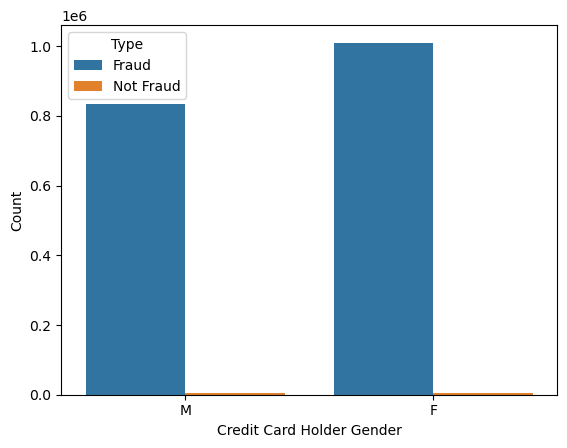

In [39]:
# Gender vs Fraud
ax=sns.countplot(x='gender',data=EDA_df, hue='is_fraud')
ax.set_ylabel('Count')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

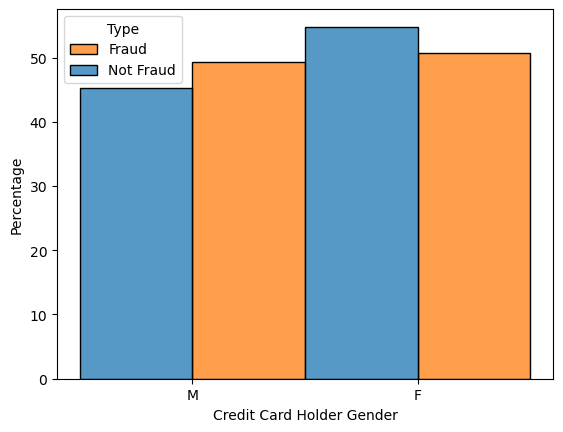

In [40]:
# Gender vs Fraud
ax=sns.histplot(x='gender',data=EDA_df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [41]:
#Category wise Fraud Transactions
FraudTransactions = EDA_df[EDA_df['is_fraud'] == 1]
FraudCount = FraudTransactions.pivot_table(index='category', values='is_fraud', aggfunc='count')
FraudCount.rename(columns={'is_fraud': 'Total Fraud'}, inplace=True)
FraudCount.sort_values(by='Total Fraud', ascending=False, inplace=True)
FraudCount

,Total Fraud
category,
grocery_pos,2228
shopping_net,2219
misc_net,1182
shopping_pos,1056
gas_transport,772
misc_pos,322
kids_pets,304
entertainment,292
personal_care,290


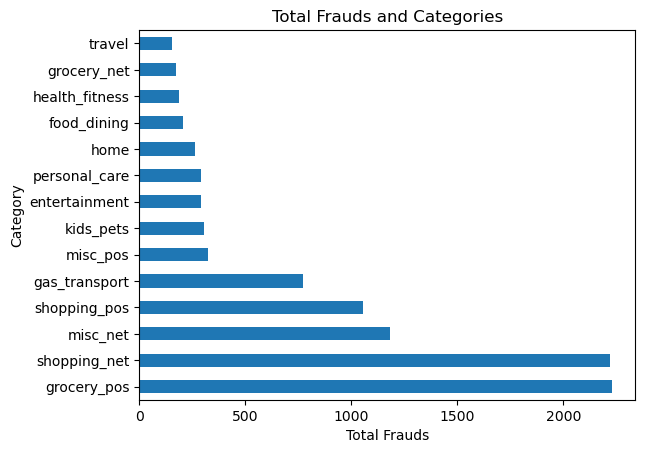

In [42]:
#FraudCount.plot(kind='barh', x=FraudCount.index, y='Total Fraud', legend=False)
FraudCount.plot(kind='barh', legend=False)
# Set labels and title
plt.xlabel('Total Frauds')
plt.ylabel('Category')
plt.title('Total Frauds and Categories')

# Show the plot
plt.show()

In [43]:
# Top 20 Merchants with Total Fraud Events

In [44]:
#Category wise Fraud Transactions
FraudCount_MerchantWise = FraudTransactions.pivot_table(index='merchant', values='is_fraud', aggfunc='count')
FraudCount_MerchantWise.rename(columns={'is_fraud': 'Total Frauds'}, inplace=True)
FraudCount_MerchantWise.sort_values(by='Total Frauds', ascending=False, inplace=True)
FraudCount_MerchantWise.head(20)

,Total Frauds
merchant,
Kilback LLC,62
Kozey-Boehm,60
Rau and Sons,60
Doyle Ltd,57
Terry-Huel,56
Boyer PLC,55
Kuhn LLC,55
Kuhic LLC,53
Kiehn-Emmerich,53


In [45]:
# Gender Wise wise Fraud Transactions
FraudCount_Gender = FraudTransactions.pivot_table(index='gender', values='is_fraud', aggfunc='count')
FraudCount_Gender.rename(columns={'is_fraud': 'Total Frauds'}, inplace=True)
FraudCount_Gender.sort_values(by='Total Frauds', ascending=False, inplace=True)
FraudCount_Gender

,Total Frauds
gender,
F,4899
M,4752


In [46]:
# State Wise wise Fraud Transactions 
FraudCount_State = FraudTransactions.pivot_table(index='state', values='is_fraud', aggfunc='count')
FraudCount_State.rename(columns={'is_fraud': 'Total Frauds'}, inplace=True)
FraudCount_State.sort_values(by='Total Frauds', ascending=False, inplace=True)
FraudCount_State

#Top 20
t20states = FraudCount_State.head(20)
t20states

,Total Frauds
state,
New York,730
Texas,592
Pennsylvania,572
California,402
Ohio,360
Florida,334
Illinois,324
Michigan,299
Minnesota,280


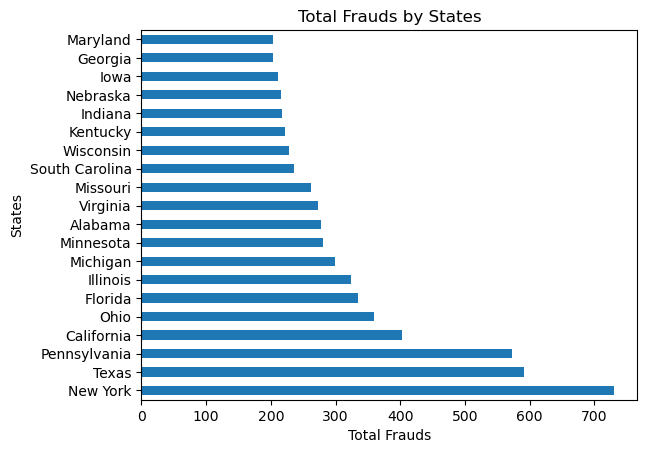

In [47]:
#FraudCount.plot(kind='barh', x=FraudCount.index, y='Total Fraud', legend=False)
t20states.plot(kind='barh', legend=False)
# Set labels and title
plt.xlabel('Total Frauds')
plt.ylabel('States')
plt.title('Total Frauds by States')

# Show the plot
plt.show()

In [48]:
# Job Type and Fraudulants
# State Wise wise Fraud Transactions 
FraudCount_JobWise = FraudTransactions.pivot_table(index='job', values='is_fraud', aggfunc='count')
FraudCount_JobWise.rename(columns={'is_fraud': 'Total Frauds'}, inplace=True)
FraudCount_JobWise.sort_values(by='Total Frauds', ascending=False, inplace=True)
FraudCount_JobWise

#Top 20
t20job = FraudCount_JobWise.head(20)
t20job

,Total Frauds
job,
Quantity surveyor,69
Naval architect,66
Materials engineer,62
Audiological scientist,58
Senior tax professional/tax inspector,57
Trading standards officer,56
Podiatrist,54
Film/video editor,52
Exhibition designer,51


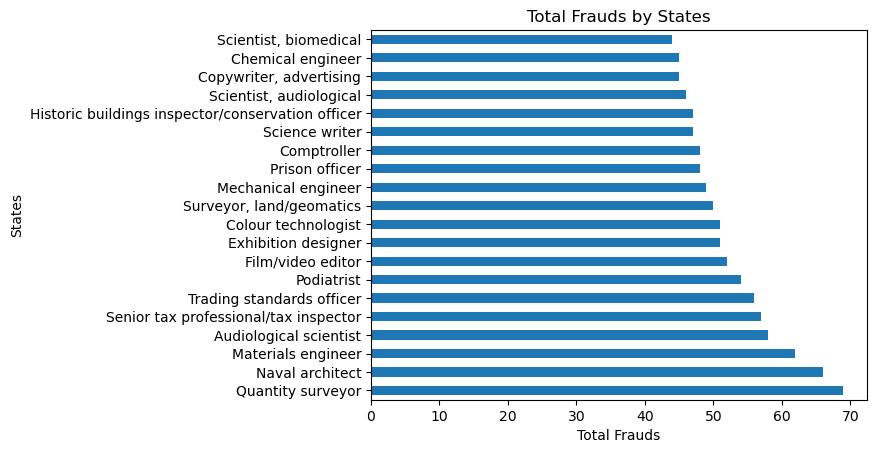

In [49]:
t20job.plot(kind='barh', legend=False)
plt.xlabel('Total Frauds')
plt.ylabel('States')
plt.title('Total Frauds by States')
plt.show()

In [50]:
# Age Distribution of Fraudulant Transactions
FraudTransactions

,merchant,category,amt,gender,city,state,job,age,Distance,trans_month,trans_year,is_fraud
1685,Hamill-D'Amore,health_fitness,24.84,F,Notrees,Texas,Cytogeneticist,54,80.649140,6,2020,1
1767,"Rodriguez, Yost and Jenkins",misc_net,780.52,M,Benton,Wisconsin,Public relations officer,65,66.097917,6,2020,1
1781,Nienow PLC,entertainment,620.33,M,Benton,Wisconsin,Public relations officer,65,28.837509,6,2020,1
1784,"Heathcote, Yost and Kertzmann",shopping_net,1077.69,M,Denham Springs,Louisiana,Herbalist,29,103.089027,6,2020,1
1857,Hermann and Sons,shopping_pos,842.65,F,Notrees,Texas,Cytogeneticist,54,60.504949,6,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1851118,Kassulke PLC,shopping_net,977.01,F,Vero Beach,Florida,"Librarian, public",37,93.097732,6,2020,1
1851210,Schumm PLC,shopping_net,1210.91,F,Vero Beach,Florida,"Librarian, public",37,84.294502,6,2020,1
1851251,"Tillman, Dickinson and Labadie",gas_transport,10.24,M,Denham Springs,Louisiana,Herbalist,29,95.206112,6,2020,1
1851385,Corwin-Collins,gas_transport,21.69,F,Notrees,Texas,Cytogeneticist,54,114.493429,6,2020,1


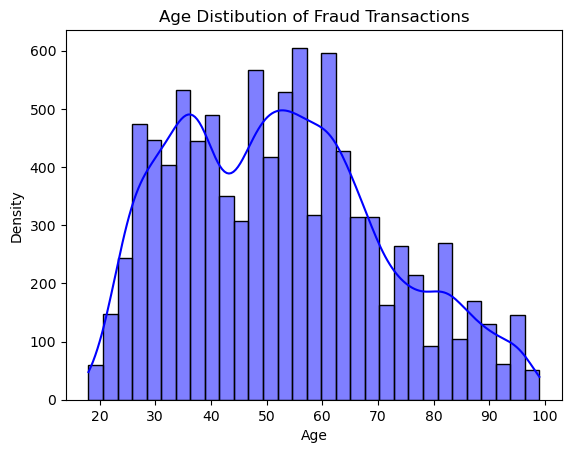

In [51]:
sns.histplot(data=FraudTransactions, x = 'age', kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distibution of Fraud Transactions')
plt.show()

In [52]:
FraudTransactions['trans_month'].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [58]:
# Months and Fraud Transactions
FraudCount_MonthWise = FraudTransactions.pivot_table(index='trans_month', values='is_fraud', aggfunc='count')
FraudCount_MonthWise.rename(columns={'is_fraud': 'Total Frauds'}, inplace=True)
FraudCount_MonthWise

,Total Frauds
trans_month,
1,849
2,853
3,938
4,678
5,935
6,821
7,652
8,797
9,758


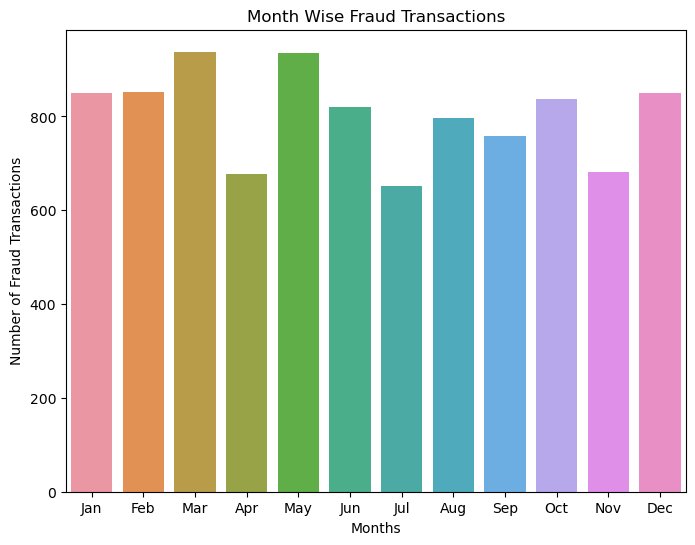

In [77]:
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
ax = sns.barplot(data = FraudCount_MonthWise, x=FraudCount_MonthWise.index, y='Total Frauds')

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(np.arange(0, 12, 1), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title('Month Wise Fraud Transactions')
plt.show()

In [82]:
# End of EDA and Start of ML Modelling
# Imbalance Check

In [83]:
NonFraud = EDA_df[EDA_df['is_fraud'] == 0]
NonFraud

,merchant,category,amt,gender,city,state,job,age,Distance,trans_month,trans_year,is_fraud
0,Kirlin and Sons,personal_care,2.86,M,Columbia,South Carolina,Mechanical engineer,55,24.561462,6,2020,0
1,Sporer-Keebler,personal_care,29.84,F,Altonah,Utah,"Sales professional, IT",33,104.925092,6,2020,0
2,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,New York,"Librarian, public",53,59.080078,6,2020,0
3,Haley Group,misc_pos,60.05,M,Titusville,Florida,Set designer,36,27.698567,6,2020,0
4,Johnston-Casper,travel,3.19,M,Falmouth,Michigan,Furniture designer,68,104.335106,6,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,Reichel Inc,entertainment,15.56,M,Hatch,Utah,Geoscientist,62,119.752136,6,2020,0
1852390,Abernathy and Sons,food_dining,51.70,M,Tuscarora,Maryland,"Production assistant, television",44,75.104085,6,2020,0
1852391,Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,New Mexico,Naval architect,56,99.047734,6,2020,0
1852392,"Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,South Dakota,Volunteer coordinator,43,84.627652,6,2020,0


In [84]:
Fraud = EDA_df[EDA_df['is_fraud'] == 1]
Fraud

,merchant,category,amt,gender,city,state,job,age,Distance,trans_month,trans_year,is_fraud
1685,Hamill-D'Amore,health_fitness,24.84,F,Notrees,Texas,Cytogeneticist,54,80.649140,6,2020,1
1767,"Rodriguez, Yost and Jenkins",misc_net,780.52,M,Benton,Wisconsin,Public relations officer,65,66.097917,6,2020,1
1781,Nienow PLC,entertainment,620.33,M,Benton,Wisconsin,Public relations officer,65,28.837509,6,2020,1
1784,"Heathcote, Yost and Kertzmann",shopping_net,1077.69,M,Denham Springs,Louisiana,Herbalist,29,103.089027,6,2020,1
1857,Hermann and Sons,shopping_pos,842.65,F,Notrees,Texas,Cytogeneticist,54,60.504949,6,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1851118,Kassulke PLC,shopping_net,977.01,F,Vero Beach,Florida,"Librarian, public",37,93.097732,6,2020,1
1851210,Schumm PLC,shopping_net,1210.91,F,Vero Beach,Florida,"Librarian, public",37,84.294502,6,2020,1
1851251,"Tillman, Dickinson and Labadie",gas_transport,10.24,M,Denham Springs,Louisiana,Herbalist,29,95.206112,6,2020,1
1851385,Corwin-Collins,gas_transport,21.69,F,Notrees,Texas,Cytogeneticist,54,114.493429,6,2020,1


In [85]:
# Apply SMOTE-NC for Balancing Data

In [149]:
EDA_df

,merchant,category,amt,gender,city,state,job,age,Distance,trans_month,trans_year,is_fraud
0,Kirlin and Sons,personal_care,2.86,M,Columbia,South Carolina,Mechanical engineer,55,24.561462,6,2020,0
1,Sporer-Keebler,personal_care,29.84,F,Altonah,Utah,"Sales professional, IT",33,104.925092,6,2020,0
2,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,New York,"Librarian, public",53,59.080078,6,2020,0
3,Haley Group,misc_pos,60.05,M,Titusville,Florida,Set designer,36,27.698567,6,2020,0
4,Johnston-Casper,travel,3.19,M,Falmouth,Michigan,Furniture designer,68,104.335106,6,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,Reichel Inc,entertainment,15.56,M,Hatch,Utah,Geoscientist,62,119.752136,6,2020,0
1852390,Abernathy and Sons,food_dining,51.70,M,Tuscarora,Maryland,"Production assistant, television",44,75.104085,6,2020,0
1852391,Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,New Mexico,Naval architect,56,99.047734,6,2020,0
1852392,"Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,South Dakota,Volunteer coordinator,43,84.627652,6,2020,0


In [150]:
ML_df = EDA_df.drop(columns=['trans_year'])

In [151]:
ML_df

,merchant,category,amt,gender,city,state,job,age,Distance,trans_month,is_fraud
0,Kirlin and Sons,personal_care,2.86,M,Columbia,South Carolina,Mechanical engineer,55,24.561462,6,0
1,Sporer-Keebler,personal_care,29.84,F,Altonah,Utah,"Sales professional, IT",33,104.925092,6,0
2,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,New York,"Librarian, public",53,59.080078,6,0
3,Haley Group,misc_pos,60.05,M,Titusville,Florida,Set designer,36,27.698567,6,0
4,Johnston-Casper,travel,3.19,M,Falmouth,Michigan,Furniture designer,68,104.335106,6,0
...,...,...,...,...,...,...,...,...,...,...,...
1852389,Reichel Inc,entertainment,15.56,M,Hatch,Utah,Geoscientist,62,119.752136,6,0
1852390,Abernathy and Sons,food_dining,51.70,M,Tuscarora,Maryland,"Production assistant, television",44,75.104085,6,0
1852391,Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,New Mexico,Naval architect,56,99.047734,6,0
1852392,"Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,South Dakota,Volunteer coordinator,43,84.627652,6,0


In [152]:
# Seperate X and Y

In [153]:
X=ML_df.drop(['is_fraud'],axis=1)
y=ML_df['is_fraud']

In [154]:
#undersampling Majority Class

from sklearn.utils import resample

# Assuming X_train and y_train are your training data
X_majority, y_majority = X[y == 0], y[y == 0]
X_minority, y_minority = X[y == 1], y[y == 1]

# Randomly undersample the majority class
X_majority_undersampled, y_majority_undersampled = resample(X_majority, y_majority, n_samples=len(X_minority), random_state=42)

# Combine the minority class and undersampled majority class
X = np.concatenate((X_majority_undersampled, X_minority), axis=0)
y = np.concatenate((y_majority_undersampled, y_minority), axis=0)

In [155]:
col_name = list(ML_df.columns)

In [156]:
col_name

['merchant',
 'category',
 'amt',
 'gender',
 'city',
 'state',
 'job',
 'age',
 'Distance',
 'trans_month',
 'is_fraud']

In [157]:
#converting series back to frame
X_New = pd.DataFrame(X)
X_New.columns = col_name[:10]
y_New = pd.DataFrame(y)
y_New.columns = col_name[10:]

In [158]:
X_New

,merchant,category,amt,gender,city,state,job,age,Distance,trans_month
0,Spinka-Welch,grocery_net,70.58,F,North Tonawanda,New York,Ambulance person,30,93.589824,8
1,"Adams, Kovacek and Kuhlman",grocery_net,29.76,F,Cowlesville,New York,Colour technologist,40,55.715809,3
2,"Witting, Beer and Ernser",home,20.24,F,Oolitic,Indiana,Counsellor,32,113.894229,8
3,"Bins, Balistreri and Beatty",shopping_pos,5.19,M,North Augusta,South Carolina,Secondary school teacher,81,113.248569,12
4,Schmitt Ltd,misc_net,28.74,F,Woods Cross,Utah,Insurance broker,44,72.389399,9
...,...,...,...,...,...,...,...,...,...,...
19297,Kassulke PLC,shopping_net,977.01,F,Vero Beach,Florida,"Librarian, public",37,93.097732,6
19298,Schumm PLC,shopping_net,1210.91,F,Vero Beach,Florida,"Librarian, public",37,84.294502,6
19299,"Tillman, Dickinson and Labadie",gas_transport,10.24,M,Denham Springs,Louisiana,Herbalist,29,95.206112,6
19300,Corwin-Collins,gas_transport,21.69,F,Notrees,Texas,Cytogeneticist,54,114.493429,6


In [160]:
y = y_New.copy()

In [159]:
# Ordinal Encoding 
from sklearn.preprocessing import OrdinalEncoder

# Specify the columns to ordinal encode
columns_to_encode = ['merchant','category','gender','city','state', 'job']

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the specified columns
encoded_data = encoder.fit_transform(X_New[columns_to_encode])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=columns_to_encode)

# Drop the original columns from the original DataFrame
X_New.drop(columns=columns_to_encode, inplace=True)

# Concatenate the encoded DataFrame with the original DataFrame
X = pd.concat([X_New, encoded_df], axis=1)

In [161]:
# Splitting Balanced and Label encoded data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [162]:
X_train

,amt,age,Distance,trans_month,merchant,category,gender,city,state,job
13278,19.71,65,87.216391,3,559.0,2.0,0.0,311.0,3.0,266.0
13972,371.7,30,93.493136,5,645.0,4.0,0.0,204.0,3.0,147.0
9352,24.01,25,51.502965,11,462.0,12.0,1.0,682.0,0.0,146.0
7889,61.17,48,53.199682,1,315.0,1.0,1.0,87.0,49.0,240.0
16941,901.28,50,92.723587,12,430.0,11.0,0.0,276.0,27.0,444.0
...,...,...,...,...,...,...,...,...,...,...
11284,19.57,38,32.196378,11,553.0,7.0,0.0,97.0,38.0,8.0
11964,870.97,52,37.362011,1,616.0,11.0,1.0,601.0,32.0,217.0
5390,1.3,28,12.528147,4,269.0,8.0,0.0,782.0,23.0,266.0
860,5.29,40,103.318149,9,142.0,8.0,0.0,260.0,46.0,68.0


In [163]:
y_train

,is_fraud
13278,1
13972,1
9352,0
7889,0
16941,1
...,...
11284,1
11964,1
5390,0
860,0


Decision Trees
Random Forests
XGBoost,
LightGBM,
CatBoost

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib # for saving ML models
import xgboost as xgb

In [164]:
# Decision Tree

In [165]:
dt_regressor = DecisionTreeRegressor(max_depth=5)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

In [166]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.10290050188229959
Mean Squared Error (MSE): 0.051400601694948735
Root Mean Squared Error (RMSE): 0.2267170079525326
R-squared (R2): 0.7943974690917464


In [167]:
# HyperParameter Optimisation
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
}

dt_regressor = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_max_depth = grid_search.best_params_['max_depth']
best_max_depth

8

In [168]:
dt_regressor = DecisionTreeRegressor(max_depth=best_max_depth)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.05100961230152227
Mean Squared Error (MSE): 0.02889217270641732
Root Mean Squared Error (RMSE): 0.16997697698928912
R-squared (R2): 0.8844312394019789


In [169]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.10339234199130258
Mean Squared Error (MSE): 0.04799104222899554
Root Mean Squared Error (RMSE): 0.2190685788263473
R-squared (R2): 0.8080357151893803


In [170]:
# Hyper Parameter Values for Optimising n_estimator and Max_depth
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 75, 100, 125, 150]
}

rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
best_max_depth = grid_search.best_params_['max_depth']
best_n_estimators = grid_search.best_params_['n_estimators']
print(best_max_depth)
print(best_n_estimators)

10
150


In [171]:
rf_regressor = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.04815790184483677
Mean Squared Error (MSE): 0.023327443632943336
Root Mean Squared Error (RMSE): 0.15273324337858912
R-squared (R2): 0.9066901691342631


In [172]:
#Saving Model
joblib.dump(dt_regressor, 'dt_regressor.pkl')
joblib.dump(rf_regressor, 'rf_regressor.pkl')

['rf_regressor.pkl']

In [173]:
# END OF PREDICTION
# Assignment Submitted by VINAY M on 14-09-2023